In [2]:
import numpy as np
import matplotlib.pyplot as plt

# From programming to ‘computer-assisted science’

You now know the basics of programming in Python.

You must practice, practice, practice to really learn this stuff. [Advent of code](https://adventofcode.com).

The best way to practice is to use Python to do something YOU want.

We are now moving towards "computer-assisted science". Our focus will become more on the ideas and tools to achieve specific tasks rather than on programming directly. Of course, knowing how to program itself is a hugely valuable skill in this endeavor and we are still here to help you with that.

# Image analysis

Images are a rich source of information, usually very intuitive for humans to understand.

Computer vision is a vast field with incredible progress

Nevertheless, our visual system is typically much better at “seeing” (image comprehension) than any computer.

# Why would we want to use computer vision in Biology?

High throughput

Eliminate human subjectivity

Reproducibility

Create new types of experiments with online image processing

# Image analysis depends on images

Typically, the image processing task can be made much easier by spending time to optimize the image acquisition (lighting, contrast, focus, and so on)

“much easier” could mean “nearly trivial and fast” from “difficult and slow” or even “possible” from “impossible”

# Example – Virtual Reality for Freely Moving Animals

Stowers JR*, Hofbauer M*, Bastien R, Griessner J⁑, Higgins P⁑, Farooqui S⁑, Fischer RM, Nowikovsky K, Haubensak W, Couzin ID, Tessmar-Raible K✎, Straw AD✎. Virtual Reality for Freely Moving Animals. *Nature Methods* 14, 995–1002 (2017) [doi:10.1038/nmeth.4399](https://doi.org/10.1038/nmeth.4399) See also https://www.youtube.com/watch?v=e_BxdbNidyQ&feature=youtu.be

![vr-fig1.jpg](vr-fig1.jpg)

# Image representations

Computer images are just arrays of data

Monochrome images are 2D arrays (h, w)

Color images can be represented as 3D arrays (h,w,channel). (Actually “2.5 D” – just 3x 2D arrays: red, green, blue)

In Python, `numpy` (`np` for short) is the most common way to manipulate arrays of numbers. Here we will create an 8x8 pixel image and put it in the variable `check`.

Images have way too much data to operate efficiently with pure Python

In [10]:
# Create a variable called `check` which will contain an 8x8 array of numbers.
check = np.zeros((8, 8))
check[::2, 1::2] = 1
check[1::2, ::2] = 1
check

array([[0., 1., 0., 1., 0., 1., 0., 1.],
       [1., 0., 1., 0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0., 1., 0., 1.],
       [1., 0., 1., 0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0., 1., 0., 1.],
       [1., 0., 1., 0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0., 1., 0., 1.],
       [1., 0., 1., 0., 1., 0., 1., 0.]])

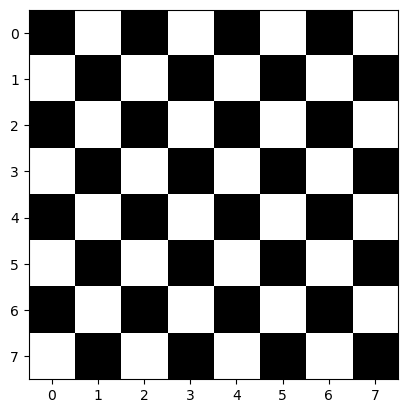

In [11]:
# Now lets view our 8x8 pixel image:
plt.imshow(check, cmap='gray');

# Key basic image analysis primitives

- Arithmetic (add, subtract, divide, multiply)
- Thresholding (greater than, less than)
- argmax and argmin
- Connected components (“labels”)
- Morphological operations, e.g. erosion and dilation
- Edge detection
- Smoothing, sharpening

Visit http://scikit-image.org/docs/stable/auto_examples/index.html

# Key image analysis tasks

- Classification

- Counting

- Detection (and localization)

- Tracking

- Measuring

# Computer vision compared to human vision

We effortlessly “see” and comprehend visual scenery.

Brain development evolved over millions of years.

We know a lot about vision, but still big questions remain.

![zebras](https://upload.wikimedia.org/wikipedia/commons/3/3a/Zebras_Serengeti.JPG)
Photo: https://commons.wikimedia.org/wiki/File:Zebras_Serengeti.JPG


# Raw image representation

- In typical image monochrome files, each pixel is stored as a single byte
- Each stored byte represents the brightness of each pixel
- A byte is 8 bits
- Decimal: 0..255
- Binary: 0000 0000..1111 1111
- For color images, each pixel is stored as 3 bytes: (Red, Green, Blue) intensity

![decimal-hex-binary](https://upload.wikimedia.org/wikipedia/commons/thumb/b/bc/CPT-Numbers-Conversion.svg/505px-CPT-Numbers-Conversion.svg.png)
Diagram: https://commons.wikimedia.org/wiki/File:CPT-Numbers-Conversion.svg

See also https://en.wikibooks.org/wiki/A-level_Computing/AQA/Paper_2/Fundamentals_of_data_representation/Number_bases

A conversion table for the first 16 integers:

| Binary | Decimal | Hex |
|--------|---------|-----|
| 0000 | 0 | 0 |
| 0001 | 1 | 1 |
| 0010 | 2 | 2 |
| 0011 | 3 | 3 |
| 0100 | 4 | 4 |
| 0101 | 5 | 5 |
| 0110 | 6 | 6 |
| 0111 | 7 | 7 |
| 1000 | 8 | 8 |
| 1001 | 9 | 9 |
| 1010 | 10 | A |
| 1011 | 11 | B |
| 1100 | 12 | C |
| 1101 | 13 | D |
| 1110 | 14 | E |
| 1111 | 15 | F |

So, one can write a single byte (8 bits) always with exactly two hex digits. This is why hex digits are often used when discussing low-level memory usage in computers. With such 8 bit numbers, 255 (decimal) is `FF` (hex). When writing hex, often the number starts with `0x`.

In [12]:
0xFF == 255

True

In [13]:
0b1111

15

In [14]:
0b1111 == 0x0F

True

In [16]:
bin(255)

'0b11111111'

In [18]:
hex(255)

'0xff'

In [19]:
0x10

16

In [20]:
hex(16)

'0x10'

In [21]:
bin(16)

'0b10000'

In [22]:
hex(15)

'0xf'

In [23]:
bin(15)

'0b1111'

# Compressed Image formats

- Lossy compression: JPG, GIF, most movie codecs
- Lossless compression: PNG, TIFF, BMP

- With modern movie formats, the codecs (compressor & decompressor) are independent from the file format (e.g. mp4, avi or mkv). The file format is mostly a "container". Common codecs for video are h264/avc, h265/hevc, vp8, vp9, or av1.

- Similar consideration applies to audio. There are specific audio formats (WAV) and also codecs for audio data which specify how the data is stored in a container like MP4 or AVI "video" files.

# Limits of images with 8 bits per channel

- 8 bits is not a large [dynamic range](https://en.wikipedia.org/wiki/Dynamic_range)
- Typically, a "good exposure" means filling the range of available intensity values. Can be checked by a histogram of pixel intensity.
- Higher “bit depth” formats also exist (e.g. 16 bit images) and are often used in scientific computing (e.g. many TIFF images). Theses are often called HDR High Dynamic Range image.

![camera](camera.png)
Image: https://github.com/scikit-image/scikit-image/blob/master/skimage/data/camera.png

In [24]:
import skimage
x = skimage.data.camera()
print(x.shape)
print(x.dtype)

(512, 512)
uint8


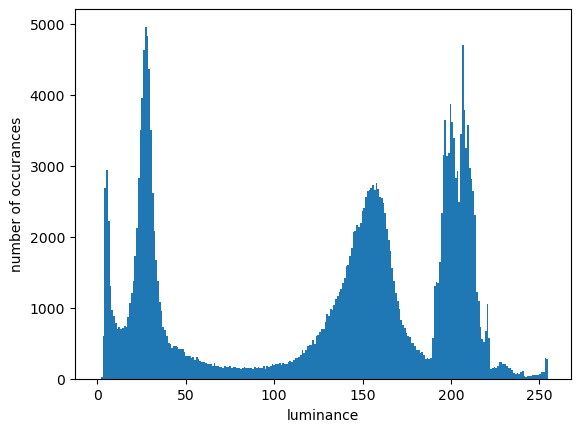

In [25]:
import skimage
plt.hist(skimage.data.camera().flat,bins=256);
plt.xlabel('luminance');
plt.ylabel('number of occurances');